In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from diffusion import GaussianDiffusion
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torchvision.transforms.v2 as v2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import torch

In [3]:
path = "./data"
dataset = CIFAR10(root=path, train=True, download=True, transform=v2.Compose([
    v2.ToTensor()
]))

dataloader = DataLoader(dataset, batch_size=1)

/home/ubuntu/.cache/pypoetry/virtualenvs/ddpm-NolEjOLK-py3.10/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


Files already downloaded and verified


In [4]:
def display_image(img):
    """
    batch: (C, H, W)
    """
    figure(figsize=(1, 1))
    img = img.permute((1, 2, 0))
    plt.imshow(img)

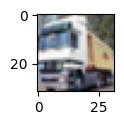

In [5]:
i = 1
img = dataset[i][0]

display_image(img)

In [6]:
beta_start = 0.0001
beta_end = 0.02
T = 1000

In [7]:
diffusion = GaussianDiffusion(
    beta_start=beta_start,
    beta_end=beta_end,
    timesteps=T
)

In [8]:
batch = img.unsqueeze(0).repeat(repeats=(2, 1, 1, 1))
batch.shape

torch.Size([2, 3, 32, 32])

In [9]:
sample = diffusion.q_sample(batch, t=100)
sample.shape

torch.Size([2, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


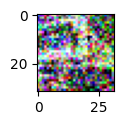

In [10]:
display_image(sample[0].squeeze(0))

In [11]:
x_t = torch.randn((1, 3, 32, 32))
x_0 = img

images = [x_t]

for t in range(1000, 1, -1):
    eps = torch.randn((1, 3, 32, 32))
    mean, var = diffusion.q_posterior_mean_var(x_t, x_0, t)
    x_t = mean + (var ** 0.5) * eps
    images.append(x_t)

IndexError: index 1000 is out of bounds for dimension 0 with size 1000

In [12]:
images

[tensor([[[[ 0.0176, -0.1554, -0.7577,  ...,  0.3036,  0.6178,  0.8224],
           [-3.0685, -0.3202,  1.1704,  ...,  0.1021, -0.7203,  0.3050],
           [-0.9826, -1.3529,  0.5960,  ..., -0.9759,  1.3595,  1.5596],
           ...,
           [ 0.1334, -2.1081,  0.0731,  ..., -0.6512, -1.2454,  0.2755],
           [ 1.5425,  0.1762,  0.1457,  ...,  1.2622, -2.7498,  0.2195],
           [ 0.4750, -0.2674, -1.1032,  ...,  0.0479, -0.4741,  1.4686]],
 
          [[ 0.4165, -0.2205, -0.5565,  ...,  0.1657, -1.1450, -1.7197],
           [ 1.0673,  0.9101, -0.3045,  ...,  0.8085, -0.8615, -1.7919],
           [-0.0127, -1.1028, -2.2023,  ...,  0.5842, -0.5982, -0.0529],
           ...,
           [ 0.6904, -0.9499,  0.1579,  ..., -0.4219,  0.1504,  0.4627],
           [ 1.3942, -0.0434, -1.2945,  ...,  0.9512, -0.5347, -0.8560],
           [ 1.2914, -0.5793, -0.9993,  ...,  1.2442, -0.4468,  0.7018]],
 
          [[ 0.8475,  0.9460,  1.3592,  ...,  0.4320,  0.2822,  0.0855],
           [ 

In [16]:
import imageio
import numpy as np

with imageio.get_writer('output_video.mp4', fps=1) as video:
    for tensor in images:
        # Remove the batch dimension and transpose the tensor to have (H, W, C) shape
        image = tensor.squeeze(0).permute(1, 2, 0).numpy()

        # image = (image - image.min()) / image.max()

        # Convert the image to uint8
        image = (image * 255).astype(np.uint8)
        video.append_data(image)

# print(images[-1].max())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


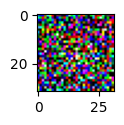

In [17]:
display_image(images[0].squeeze(0))

In [18]:
display_image(images[1].squeeze(0))

IndexError: list index out of range

In [19]:
display_image(images[10].squeeze(0))

IndexError: list index out of range

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


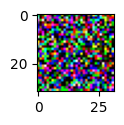

In [195]:
display_image(images[100].squeeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


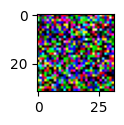

In [196]:
display_image(images[250].squeeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


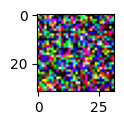

In [197]:
display_image(images[500].squeeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


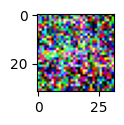

In [198]:
display_image(images[750].squeeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


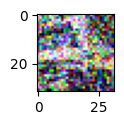

In [199]:
display_image(images[900].squeeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


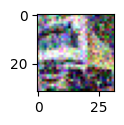

In [201]:
display_image(images[950].squeeze(0))

In [25]:
from unet import Swish, Upsample, Downsample, ResNetBlock, UNet
import torch

In [3]:
swish = Swish().to("cuda")
swish

Swish()

In [4]:
a = torch.tensor([1.0, 1], requires_grad=True).to("cuda")
a

tensor([1., 1.], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [5]:
swish(a).sum().backward()

In [6]:
upsample = Upsample(32, with_conv=True)

In [7]:
x = torch.zeros((1, 32, 32, 32))

In [8]:
upsample(x).shape

torch.Size([1, 32, 64, 64])

In [9]:
downsample = Downsample(32, with_conv=True)

In [10]:
x = torch.zeros((1, 32, 16, 16))

In [11]:
downsample(x).shape

torch.Size([1, 32, 8, 8])

In [12]:
t = torch.ones((1, 128))
x = torch.zeros((1, 32, 16, 16))

In [23]:
resnet_block = ResNetBlock(32, 64, 128)

In [24]:
resnet_block(x, t).shape

torch.Size([1, 64, 16, 16]) torch.Size([1, 64, 16, 16])


torch.Size([1, 64, 16, 16])

In [19]:
a = torch.zeros((1, 2))
a.shape

a[:, :, None, None].shape

torch.Size([1, 2, 1, 1])

In [34]:
unet = UNet(3, 64, 1, num_res_blocks=2, attention_resolutions=(2))

In [35]:
x = torch.zeros((1, 3, 32, 32))
t = torch.zeros((1))

In [36]:
unet(x, t)